In [40]:
import numpy as np
import pandas as pd
import investpy
import matplotlib.pyplot as plt
import pandas_datareader as web

In [41]:
plt.style.use('fivethirtyeight')

In [43]:
df = web.DataReader('DOGUB.IS',data_source='yahoo',start='2020-11-01',end='2020-12-26')
df.shape
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-02,3.60,3.46,3.56,3.48,242511,3.48
2020-11-03,3.63,3.25,3.56,3.50,270146,3.50
2020-11-04,3.58,3.34,3.50,3.48,321941,3.48
2020-11-05,3.69,3.47,3.48,3.58,490014,3.58
2020-11-06,3.60,3.42,3.60,3.56,338312,3.56
2020-11-09,3.68,3.56,3.64,3.63,439817,3.63
2020-11-10,3.80,3.60,3.66,3.70,548327,3.70
2020-11-11,3.79,3.68,3.73,3.71,437986,3.71
2020-11-12,3.72,3.50,3.72,3.59,507399,3.59


In [44]:
##df = investpy.get_index_historical_data(index='BIST 100',country='Turkey', from_date='20/01/2020',to_date='24/12/2020')
##df

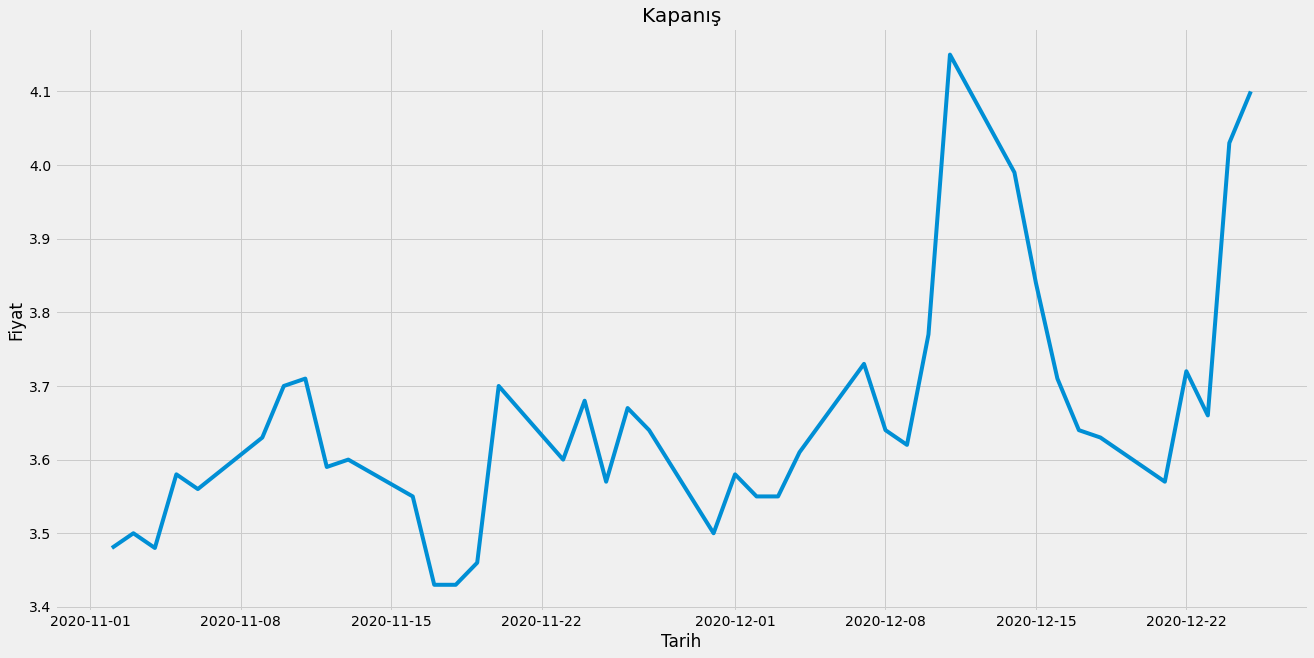

In [45]:
plt.figure(figsize=(20,10))
plt.plot(df['Close'],label='Kapanış')
plt.title('Kapanış')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.show()


In [46]:
shortEMA = df.Close.ewm(span=12,adjust=False).mean()
longEMA = df.Close.ewm(span=26,adjust=False).mean()
MACD = shortEMA - longEMA
signal = MACD.ewm(span=9,adjust=False).mean()


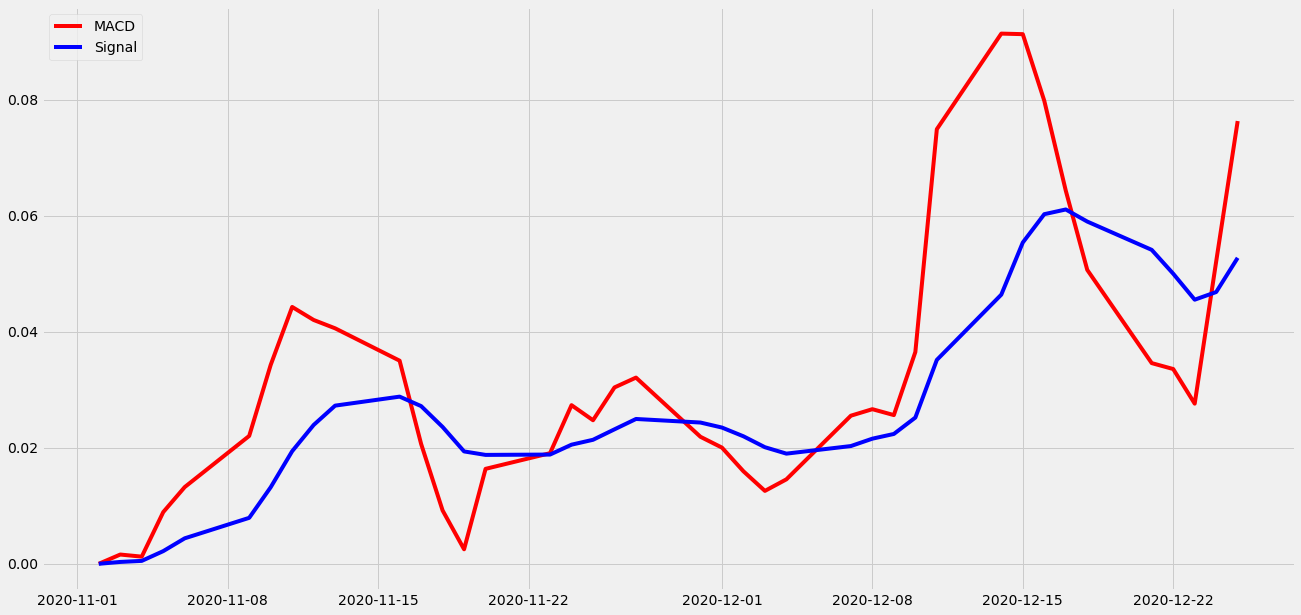

In [47]:
plt.figure(figsize=(20,10))
plt.plot(df.index, MACD, label='MACD', color='red')
plt.plot(df.index, signal, label='Signal',color='blue')
plt.legend(loc = 'upper left')
plt.show()

In [48]:
df['MACD'] = MACD
df['Signal'] = signal
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal
Date,,,,,,,,
2020-11-02,3.60,3.46,3.56,3.48,242511,3.48,0.000000,0.000000
2020-11-03,3.63,3.25,3.56,3.50,270146,3.50,0.001595,0.000319
2020-11-04,3.58,3.34,3.50,3.48,321941,3.48,0.001232,0.000502
2020-11-05,3.69,3.47,3.48,3.58,490014,3.58,0.008910,0.002183
2020-11-06,3.60,3.42,3.60,3.56,338312,3.56,0.013229,0.004392
2020-11-09,3.68,3.56,3.64,3.63,439817,3.63,0.022046,0.007923
2020-11-10,3.80,3.60,3.66,3.70,548327,3.70,0.034286,0.013196
2020-11-11,3.79,3.68,3.73,3.71,437986,3.71,0.044284,0.019413
2020-11-12,3.72,3.50,3.72,3.59,507399,3.59,0.042039,0.023938


In [49]:
def buy_sell(signal):
    buy = []
    sell = []
    flag = -1
    for i in range ( 0, len(signal)):
        if signal['MACD'][i] > signal['Signal'][i]:
            sell.append(np.nan)
            if flag != 1:
                buy.append(signal['Close'][i])
                flag = 1
            else:
                buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal'][i]:
            buy.append(np.nan)
            if flag != 0 :
                sell.append(signal['Close'][i])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            sell.append(np.nan)
            buy.append(np.nan)
    return (buy,sell)
            
            
                

In [50]:
a = buy_sell(df)
df['Buy_Price'] = a[0]
df['Sell_Price'] = a[1]
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal,Buy_Price,Sell_Price
Date,,,,,,,,,,
2020-11-02,3.60,3.46,3.56,3.48,242511,3.48,0.000000,0.000000,NaN,NaN
2020-11-03,3.63,3.25,3.56,3.50,270146,3.50,0.001595,0.000319,3.50,NaN
2020-11-04,3.58,3.34,3.50,3.48,321941,3.48,0.001232,0.000502,NaN,NaN
2020-11-05,3.69,3.47,3.48,3.58,490014,3.58,0.008910,0.002183,NaN,NaN
2020-11-06,3.60,3.42,3.60,3.56,338312,3.56,0.013229,0.004392,NaN,NaN
2020-11-09,3.68,3.56,3.64,3.63,439817,3.63,0.022046,0.007923,NaN,NaN
2020-11-10,3.80,3.60,3.66,3.70,548327,3.70,0.034286,0.013196,NaN,NaN
2020-11-11,3.79,3.68,3.73,3.71,437986,3.71,0.044284,0.019413,NaN,NaN
2020-11-12,3.72,3.50,3.72,3.59,507399,3.59,0.042039,0.023938,NaN,NaN


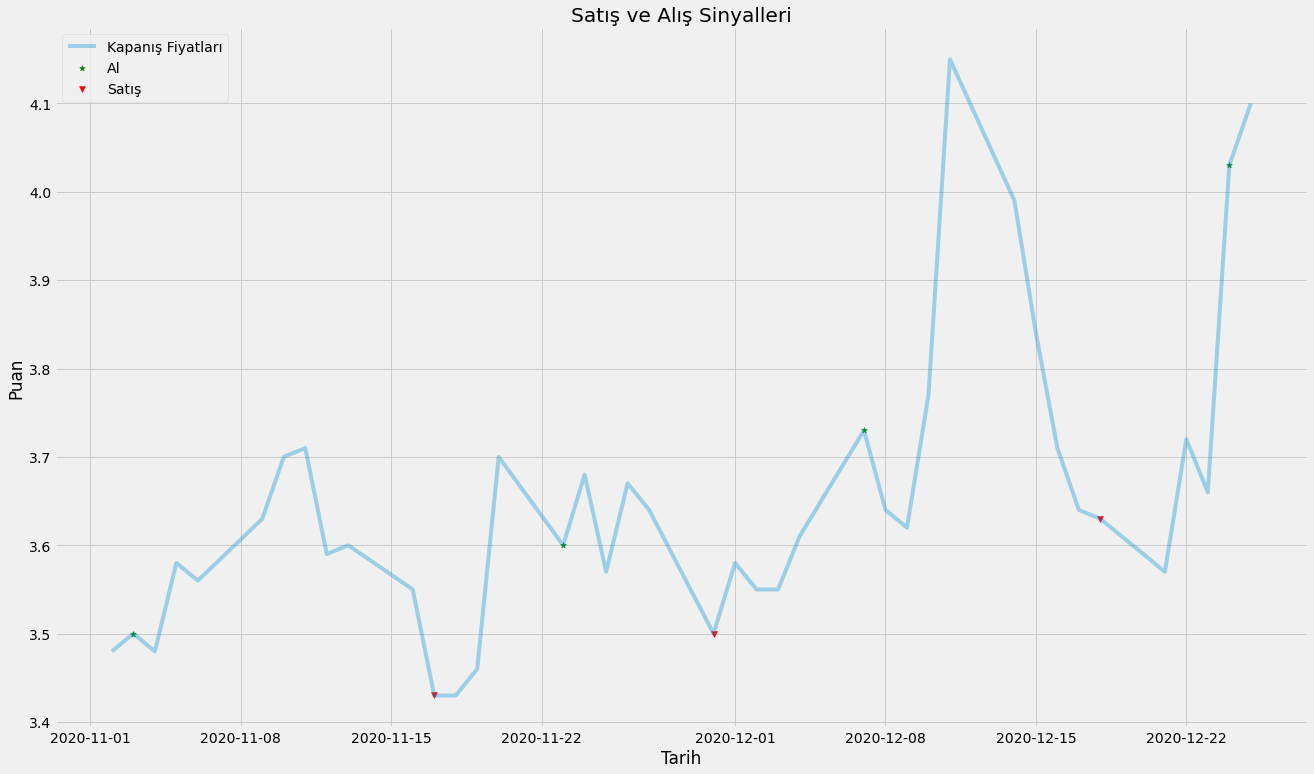

In [51]:
plt.figure(figsize=(20,12))
plt.scatter(df.index,df['Buy_Price'],color='green',label='Al',marker='*',alpha=1)
plt.scatter(df.index,df['Sell_Price'],color='red',label='Satış',marker='v',alpha=1)
plt.plot(df['Close'],label='Kapanış Fiyatları',alpha=0.35)
plt.title('Satış ve Alış Sinyalleri')
plt.legend(loc='upper left')
plt.xlabel('Tarih')
plt.ylabel('Puan')
plt.show()
